In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
from copy import deepcopy

%matplotlib inline

sns.set_theme(style='ticks', context='talk', font_scale=1.5, font="Helvetica")

RANDOM_SEED = 8927

### Figure 1D

In [2]:
xls = pd.ExcelFile('./exp_data/Mouth_form_Gymnogaster_derived_Pristionchus_strains_2024.xlsx')

df = pd.DataFrame()
for i in xls.sheet_names:
    temp = pd.read_excel(xls, i, index_col=0)
    temp['Species'] = i
    df = pd.concat([df, temp])
df = df.reset_index()

/var/folders/pm/bzk7nww90wj754l2_x791q1h0000gn/T/ipykernel_52179/3181788265.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, size=15)


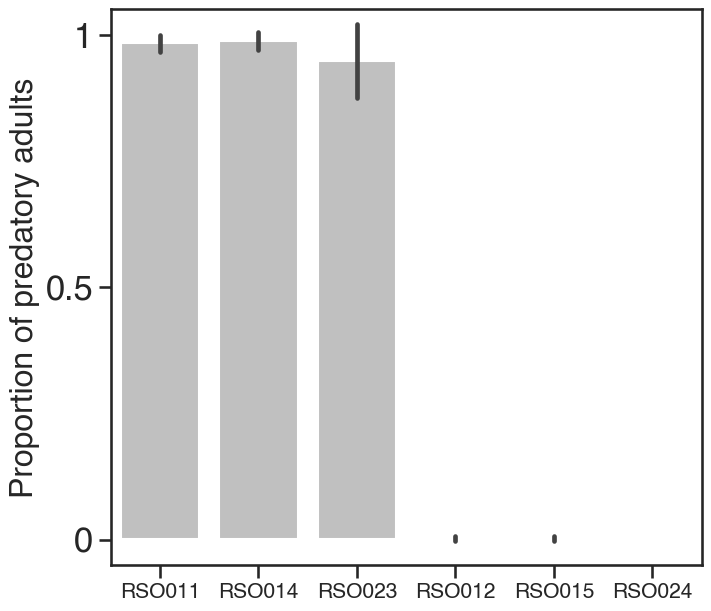

In [3]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(7,6),
    constrained_layout=True)


sns.barplot(data=df, x='Strain', y='Eu_over_50_animals', color='silver', errorbar='sd', ax=ax)

ax.set_xlabel("")

ax.set_ylabel('')
ax.set_ylim(-0.05, 1.05)
ax.set_yticks([-0.0005, 0.5, 1])
ax.set_yticklabels(['0', '0.5', '1'])

ax.set_ylabel(r'Proportion of predatory adults', size=23)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, size=15)

plt.show();

### Figure 1E

In [5]:
sexR_xls = pd.ExcelFile('./exp_data/Acrostichus_RSO013_sex_ratio.xlsx')
temp =pd.read_excel(sexR_xls, 'Dataset')

new_df = pd.DataFrame()

start_index = 1  # Starting index of the range
end_index = 3   
count = 4
day = 1
for i in np.arange(0, 15, 1):
    selected_columns = temp.iloc[:, start_index+count*i:end_index+count*i]
    selected_columns.columns = selected_columns.iloc[0]  # Set the second row as the header
    selected_columns = selected_columns[1:].reset_index(drop=True)
    selected_columns['Day'] = day
    selected_columns['Worm ID'] = [j for j in np.arange(1, 31, 1)]
    selected_columns = selected_columns.map(lambda x: np.nan if (isinstance(x, str)) else x)
    n_tot = np.sum(selected_columns['Male']) + np.sum(selected_columns['Female'])
    selected_columns['Male_prop'] = selected_columns['Male'] / n_tot
    selected_columns['Female_prop'] = selected_columns['Female'] / n_tot
    new_df = pd.concat([new_df, selected_columns])
    if day == 13 or day == 15:
        day += 2
    else:
        day += 1

new_df = new_df.reset_index()
new_df = new_df.drop(columns='index')

- A bayesian model to infer the 95% HDI for sex ratio based on the experimental data

In [6]:
def get_binom(n, x):
    with pm.Model() as model:
        p = pm.Beta('p', alpha=2, beta=2)
        likelihood = pm.Binomial('likelihood', n=n, p=p, observed=x)
        trace = pm.sample(2000, tune=1000, return_inferencedata=True)
    return trace

In [7]:
prop = []
for i in np.unique(new_df['Day']):
    males = np.sum(new_df[new_df['Day'] == i]['Male'])
    females = np.sum(new_df[new_df['Day'] == i]['Female'])
    tot = females + males
    prop.append(males/tot)

In [8]:
hdi_list = []
for i in np.unique(new_df['Day']):
    males = np.sum(new_df[new_df['Day'] == i]['Male'])
    females = np.sum(new_df[new_df['Day'] == i]['Female'])
    tot = females + males
    test = get_binom(tot, males)
    hdi_list.append((az.summary(test, hdi_prob=0.95)['hdi_2.5%']['p'], az.summary(test, hdi_prob=0.95)['hdi_97.5%']['p']))

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 0 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 0 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 0 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 0 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 0 seconds.


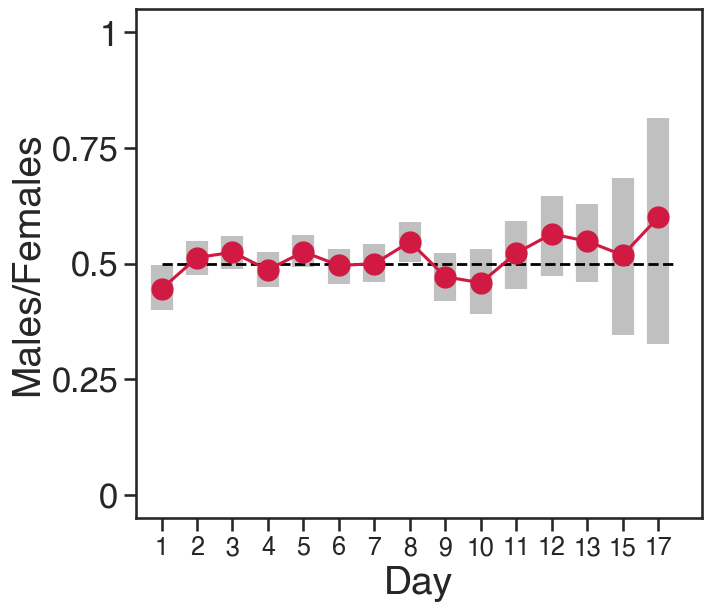

In [12]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(7,6),
    constrained_layout=True)

days = new_df.Day.unique()

ax.hlines(0.5, 0, 14.5, lw=2, color='black', linestyle='--')
cols = sns.dark_palette((0.82, 0.1, 0.26), n_colors=2)
ax.plot(prop, '-o', ms=15, color=cols[1])
ax.set(ylim=(0,1), yticks=np.linspace(0, 1, 5), xticks=np.linspace(1, 15, 6))

count = 0
for i in hdi_list:
    ax.vlines(count, i[0], i[1], lw=16, zorder=1, color='silver')
    count += 1

ax.set_ylabel('Males/Females', size=28)

ax.set_xlabel('Day', size=28)
ax.set_ylim(-0.05, 1.05)
ax.set_yticklabels(['0', '0.25', '0.5', '0.75', '1'])
ax.set_ylim(-0.05, 1.05)

ax.set_xticks(np.arange(0, 15, 1))
ax.set_xticklabels(days, fontsize=18)
plt.show();

In [13]:
xls = pd.ExcelFile('./exp_data/fecundity_assay_conv.xlsx')

df = pd.DataFrame()
for i in xls.sheet_names:
    temp = pd.read_excel(xls, i, index_col=0)
    df = pd.concat([df, temp])
df = df.reset_index()

### Figure 1F

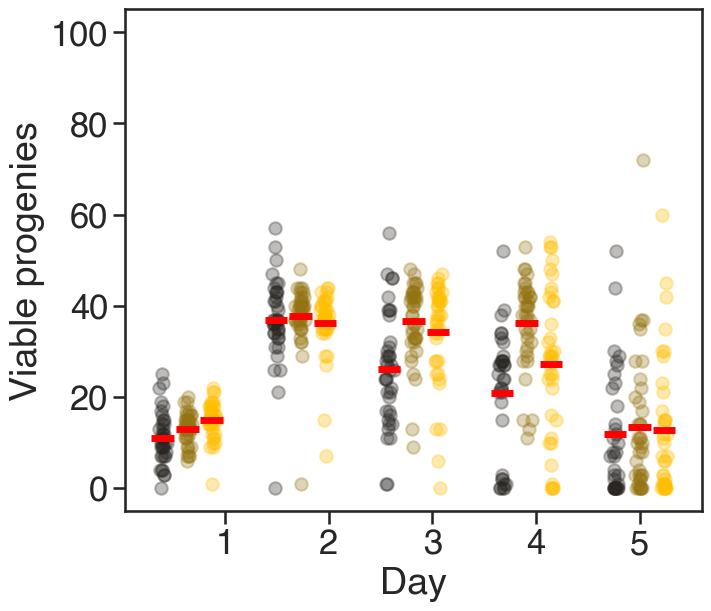

In [14]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(7,6),
    constrained_layout=True)

subdata = df[df['Species ']=='P. pacificus']

col_palette = sns.dark_palette((1.0, 0.75, 0.0), n_colors=3)

strains = list(subdata['Strain '].unique())
for strain, disp, cols in zip(strains, [-0.65,0,0.65],col_palette):
    subsubdata = subdata[subdata['Strain '] == strain]
    pos = disp
    for i, day in enumerate(np.arange(1, 6, 1)):
        y = subsubdata[subsubdata['Day '] == day]['Count ']
        x = [pos + np.random.normal(scale=0.05) for j in range(len(y))]
        ax.scatter(x, y, alpha=0.3, color=cols, label=strain)
        delta = 0.3
        if i == 0:
            ax.hlines(np.mean(y), pos - delta, pos + delta, lw=5, color='red')
        else:
            ax.hlines(np.mean(y), pos - delta, pos + delta, lw=5, color='red')
        pos += 3

ax.set_ylim(-5, 105)
ax.set_xticks(np.linspace(1, 12, 5))
ax.set_xticklabels(['1', '2', '3', '4', '5'])
ax.set_xlabel('Day')
ax.set_ylabel('Viable progenies')


plt.show();


### Figure 1G

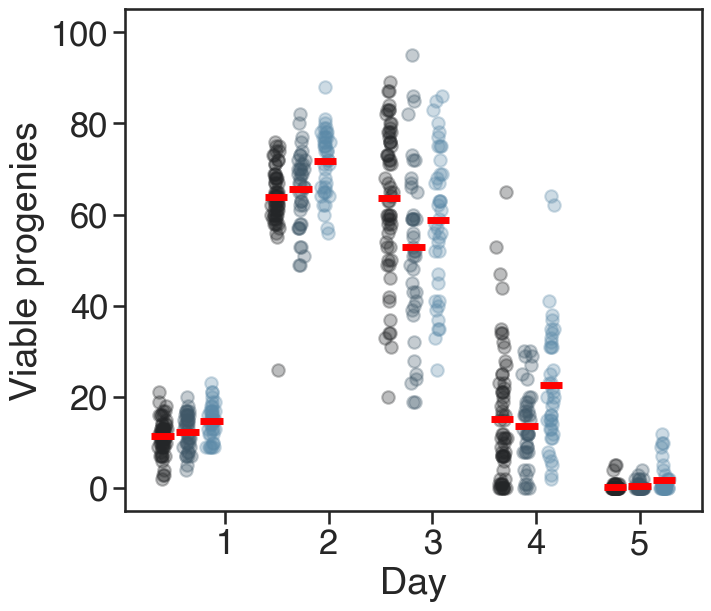

In [15]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(7,6),
    constrained_layout=True)

subdata = df[df['Species ']=='P. mayeri']

col_palette = sns.dark_palette((0.36, 0.54, 0.66), n_colors=3)

strains = list(subdata['Strain '].unique())
for strain, disp, cols in zip(strains, [-0.65,0,0.65],col_palette):
    subsubdata = subdata[subdata['Strain '] == strain]
    pos = disp
    for i, day in enumerate(np.arange(1, 6, 1)):
        y = subsubdata[subsubdata['Day '] == day]['Count ']
        x = [pos + np.random.normal(scale=0.05) for j in range(len(y))]
        ax.scatter(x, y, alpha=0.3, color=cols)
        delta = 0.3
        if i == 0:
            ax.hlines(np.mean(y), pos - delta, pos + delta, lw=5, color='red')
        else:
            ax.hlines(np.mean(y), pos - delta, pos + delta, lw=5, color='red')
        pos += 3

ax.set_ylim(-5, 105)
ax.set_xticks(np.linspace(1, 12, 5))
ax.set_xticklabels(['1', '2', '3', '4', '5'])
ax.set_xlabel('Day')
ax.set_ylabel('Viable progenies')


plt.show();

In [17]:
sexR_xls = pd.ExcelFile('./exp_data/Acrostichus_RSO013_sex_ratio.xlsx')
temp =pd.read_excel(sexR_xls, 'Dataset')

new_df = pd.DataFrame()

start_index = 1  # Starting index of the range
end_index = 3   
count = 4
day = 1
for i in np.arange(0, 15, 1):
    selected_columns = temp.iloc[:, start_index+count*i:end_index+count*i]
    selected_columns.columns = selected_columns.iloc[0]  # Set the second row as the header
    selected_columns = selected_columns[1:].reset_index(drop=True)
    selected_columns['Day'] = day
    selected_columns['Worm ID'] = [j for j in np.arange(1, 31, 1)]
    selected_columns = selected_columns.map(lambda x: np.nan if (isinstance(x, str)) else x)
    n_tot = np.sum(selected_columns['Male']) + np.sum(selected_columns['Female'])
    selected_columns['Male_prop'] = selected_columns['Male'] / n_tot
    selected_columns['Female_prop'] = selected_columns['Female'] / n_tot
    new_df = pd.concat([new_df, selected_columns])
    if day == 13 or day == 15:
        day += 2
    else:
        day += 1

new_df = new_df.reset_index()
new_df = new_df.drop(columns='index')

### Figure 1H

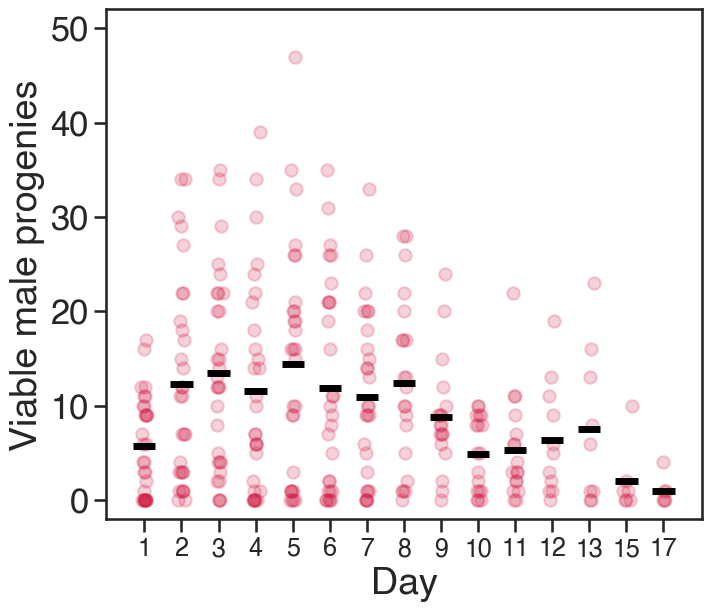

In [20]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(7,6),
    constrained_layout=True)

days = new_df.Day.unique()
cols = sns.dark_palette((0.82, 0.1, 0.26), n_colors=2)
pos = 1
delta = 0.3
for day in days:
    subdata = new_df[new_df['Day']== day]
    y = subdata['Male']
    x = [pos + np.random.normal(scale=0.05) for j in range(len(y))]
    ax.scatter(x, y, alpha=0.2, color=cols[1])
    ax.hlines(np.mean(y), pos - delta, pos + delta, lw=5, color='black')
    pos += 1

ax.set_xticks(np.arange(1, 16, 1))
ax.set_xticklabels(days, fontsize=18)
ax.set_xlabel('Day')
ax.set_ylabel('Viable male progenies')

ax.set_yticks(np.linspace(0, 50, 6))
ax.set_ylim(-2, 52)

plt.show();

### Figure 1I

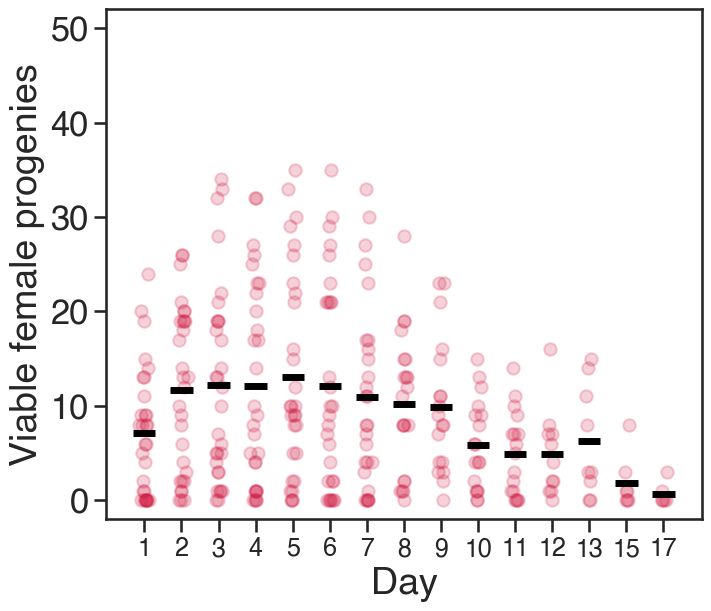

In [21]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(7,6),
    constrained_layout=True)

days = new_df.Day.unique()

pos = 1
delta = 0.3
for day in days:
    subdata = new_df[new_df['Day']== day]
    y = subdata['Female']
    x = [pos + np.random.normal(scale=0.05) for j in range(len(y))]
    ax.scatter(x, y, alpha=0.2, color=cols[1])
    ax.hlines(np.mean(y), pos - delta, pos + delta, lw=5, color='black')
    pos += 1

ax.set_xticks(np.arange(1, 16, 1))
ax.set_xticklabels(days, fontsize=18)
ax.set_xlabel('Day')
ax.set_ylabel('Viable female progenies')

ax.set_yticks(np.linspace(0, 50, 6))
ax.set_ylim(-2, 52)

plt.show();